In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
setwd("/content/drive/MyDrive/tripdatcyc/2014")

In [4]:
%%R
list.files()

[1] "Divvy_Trips_2014_Q1Q2.csv"    "Divvy_Trips_2014-Q3-07.csv"  
[3] "Divvy_Trips_2014-Q3-0809.csv" "Divvy_Trips_2014-Q4.csv"     


In [5]:
%%R
library(tidyverse)
library(lubridate)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [6]:
%%R
trip14q1q2 = read_csv("Divvy_Trips_2014_Q1Q2.csv")
trip14q3_7 = read_csv("Divvy_Trips_2014-Q3-07.csv")
trip14q3_89 = read_csv("Divvy_Trips_2014-Q3-0809.csv")
trip14q4 = read_csv("Divvy_Trips_2014-Q4.csv")

Rows: 905699 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): starttime, stoptime, from_station_name, to_station_name, usertype, ...
dbl (6): trip_id, bikeid, tripduration, from_station_id, to_station_id, birt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 410340 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): starttime, stoptime, from_station_name, to_station_name, usertype, ...
dbl (6): trip_id, bikeid, tripduration, from_station_id, to_station_id, birt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 700630 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6)

In [7]:
%%R
trip14 = rbind(trip14q1q2,trip14q3_7,trip14q3_89,trip14q4)

In [9]:
%%R
str(trip14)

spec_tbl_df [2,454,634 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ trip_id          : num [1:2454634] 2355134 2355133 2355130 2355129 2355128 ...
 $ starttime        : chr [1:2454634] "6/30/2014 23:57" "6/30/2014 23:56" "6/30/2014 23:33" "6/30/2014 23:26" ...
 $ stoptime         : chr [1:2454634] "7/1/2014 0:07" "7/1/2014 0:00" "6/30/2014 23:35" "7/1/2014 0:24" ...
 $ bikeid           : num [1:2454634] 2006 2217 2798 173 173 ...
 $ tripduration     : num [1:2454634] 604 263 126 3481 638 ...
 $ from_station_id  : num [1:2454634] 131 282 327 134 320 332 174 199 288 238 ...
 $ from_station_name: chr [1:2454634] "Lincoln Ave & Belmont Ave" "Halsted St & Maxwell St" "Sheffield Ave & Webster Ave" "Peoria St & Jackson Blvd" ...
 $ to_station_id    : num [1:2454634] 303 22 225 194 134 319 44 24 94 316 ...
 $ to_station_name  : chr [1:2454634] "Broadway & Cornelia Ave" "May St & Taylor St" "Halsted St & Dickens Ave" "State St & Wacker Dr" ...
 $ usertype         : chr [1:2454634] "Subscrib

In [11]:
%%R
trip14 = trip14[,c(-11,-12)]
names(trip14)

 [1] "trip_id"           "starttime"         "stoptime"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"         


In [12]:
%%R
trip14$starttime = strptime(trip14$starttime,format="%m/%d/%Y %H:%M")
trip14$stoptime = strptime(trip14$stoptime,format="%m/%d/%Y %H:%M")

In [13]:
%%R
print(dim(trip14)[1])
print(length(unique(trip14$trip_id)))

[1] 2454634
[1] 2454634


In [14]:
%%R
tail(trip14)$stoptime

[1] "2014-10-01 00:29:00 UTC" "2014-10-01 00:16:00 UTC"
[3] "2014-10-01 00:10:00 UTC" "2014-10-01 00:16:00 UTC"
[5] "2014-10-01 00:05:00 UTC" "2014-10-01 00:09:00 UTC"


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



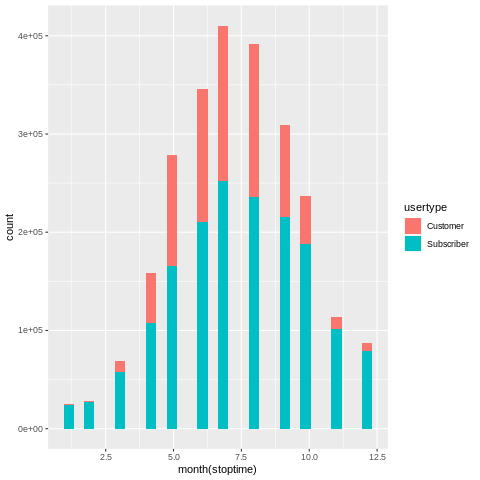

In [15]:
%%R
ggplot(data=trip14)+geom_histogram(mapping=aes(x=month(stoptime),fill=usertype))

In [16]:
%%R
write_csv(trip14,"triptotal14.csv")